<a href="https://colab.research.google.com/github/jlopetegui98/Literary-Fine-Tuning-of-LLM/blob/main/ClassifierForAA/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install -U simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.2 MB/

In [29]:
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from simpletransformers.classification import ClassificationModel

In [ ]:
# authors and author paths
authors_paths = []
authors_names = []

In [3]:
# function to read the texts of an specific author
def read_texts(path: str, label, max_length = 350):
    text = ''
    with open(path, 'r+') as fd:
      text = fd.read()
    text_splited = text.split()
    dt = {'text': [], 'label': []}
    for i in range(0,len(text_splited),max_length):
      dt['text'].append(' '.join(text_splited[i:min(i+max_length, len(text_splited - i))]))
      dt['label'].append(label)
    return dt

In [13]:
# iterate through every author and build the dataset
dt = {'text': [], 'label': []}
for i,path in enumerate(authors_paths):
  dt_i = read_texts(path,i)
  dt['text'].extend(dt_i['text'])
  dt['label'].extend(dt_i['label'])

In [15]:
for i in range(100):
  dt['text'].append("Mi texto numero " + str(i))
  dt['label'].append(i%2)

In [16]:
# convert the dataset to DataFrame
dt = DataFrame.from_dict(dt)
dt.head()

,text,label
0,Mi texto numero 0,0
1,Mi texto numero 1,1
2,Mi texto numero 2,0
3,Mi texto numero 3,1
4,Mi texto numero 4,0


In [17]:
dt_train, dt_test = train_test_split(dt, test_size=0.2, random_state=42, shuffle=True)

In [20]:
dt_train.head()

,text,label
55,Mi texto numero 55,1
88,Mi texto numero 88,0
26,Mi texto numero 26,0
42,Mi texto numero 42,0
69,Mi texto numero 69,1


In [19]:
dt_test.head()

,text,label
83,Mi texto numero 83,1
53,Mi texto numero 53,1
70,Mi texto numero 70,0
45,Mi texto numero 45,1
44,Mi texto numero 44,0


array([[<Axes: title={'center': 'label'}>]], dtype=object)

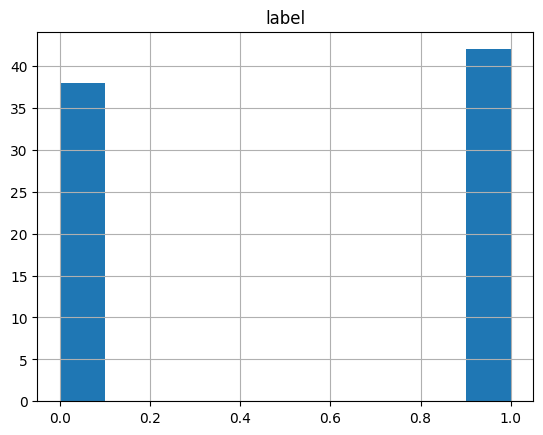

In [24]:
dt_train.hist()

array([[<Axes: title={'center': 'label'}>]], dtype=object)

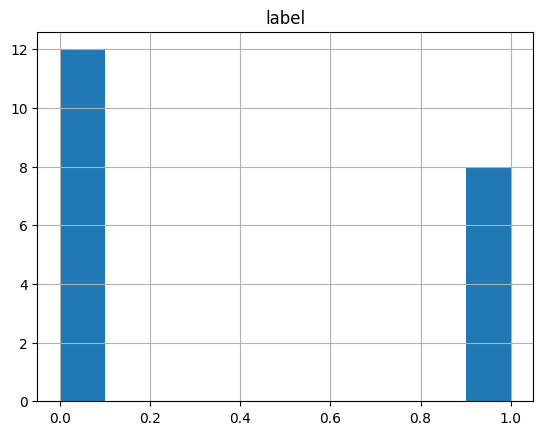

In [25]:
dt_test.hist()

In [26]:
# define model for classifier and initial weights
model_name = 'bert'
model_weights =  'bert-base-cased'

In [ ]:
model = ClassificationModel(model_name, model_weights, num_labels=2, weight = [1 - sum(dt_train['label'])/len(dt_train['label']), sum(dt_train['label'])/len(dt_train['label'])], args={'reprocess_input_data': True, 'overwrite_output_dir': True,  'num_train_epochs' : 15}, use_cuda=True)
model.train_model(dt_train)

In [ ]:
predictions, raw_out = model.predict(dt_test['text'])

In [ ]:
classification_report(dt_test['label'], predictions)